## Flight Price Prediction

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Flight_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [7]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [8]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [13]:
print("min: ", df['duration'].min())
print("max: ", df['duration'].max())
print("Median: ", df['duration'].median() )

min:  0.83
max:  49.83
Median:  11.25


### Preprocessing

In [14]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [15]:
df.stops=pd.factorize(df.stops)[0]

In [16]:
df=df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1).replace(({True: 1, False: 0}))
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1).replace(({True: 1, False: 0}))
df=df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1).replace(({True: 1, False: 0}))
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1).replace(({True: 1, False: 0}))
df=df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1).replace(({True: 1, False: 0}))

In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Training model


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [19]:
X, y=df.drop('price', axis=1),df.price

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
reg=RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
reg.score(X_test, y_test)

0.9852318067334009

In [24]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred=reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_absolute_error(y_test, y_pred)))

R2:  0.9852318067334009
MAE:  1069.4684815020837
MSE:  7629897.582559625
RMSE:  32.70272896108341


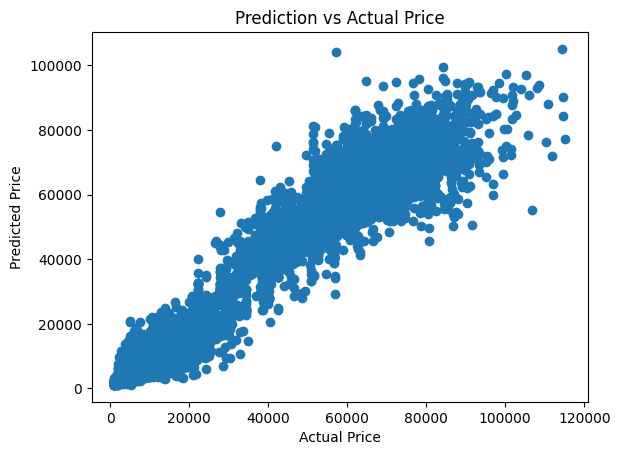

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Actual Price")
plt.show()

In [26]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [27]:
importances=dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_imps=sorted(importances.items(), key=lambda x: x[1], reverse=True)

In [28]:
sorted_imps

[('class', 0.8798715450326261),
 ('duration', 0.05758208367822584),
 ('days_left', 0.018549483125289944),
 ('airline_Air_India', 0.005263503488571143),
 ('airline_Vistara', 0.0046013227439385355),
 ('source_Delhi', 0.0037306498596798173),
 ('dest_Delhi', 0.0034051562619280785),
 ('source_Mumbai', 0.002242730800219166),
 ('stops', 0.0019502263380052755),
 ('dest_Mumbai', 0.0018573330583766677),
 ('source_Kolkata', 0.0018289256574751435),
 ('dest_Kolkata', 0.0018269070069545103),
 ('arrival_Evening', 0.001611666573701324),
 ('dest_Hyderabad', 0.0014148990322694233),
 ('dest_Bangalore', 0.0012611932933218615),
 ('source_Hyderabad', 0.0012083123348606494),
 ('arrival_Night', 0.0011448218844197391),
 ('source_Bangalore', 0.0010784737482622327),
 ('departure_Evening', 0.0010649457135036662),
 ('arrival_Afternoon', 0.000993242287712295),
 ('source_Chennai', 0.0009715354800407866),
 ('dest_Chennai', 0.0009071675071453065),
 ('departure_Morning', 0.0009055468590655709),
 ('departure_Early_Morni

In [29]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

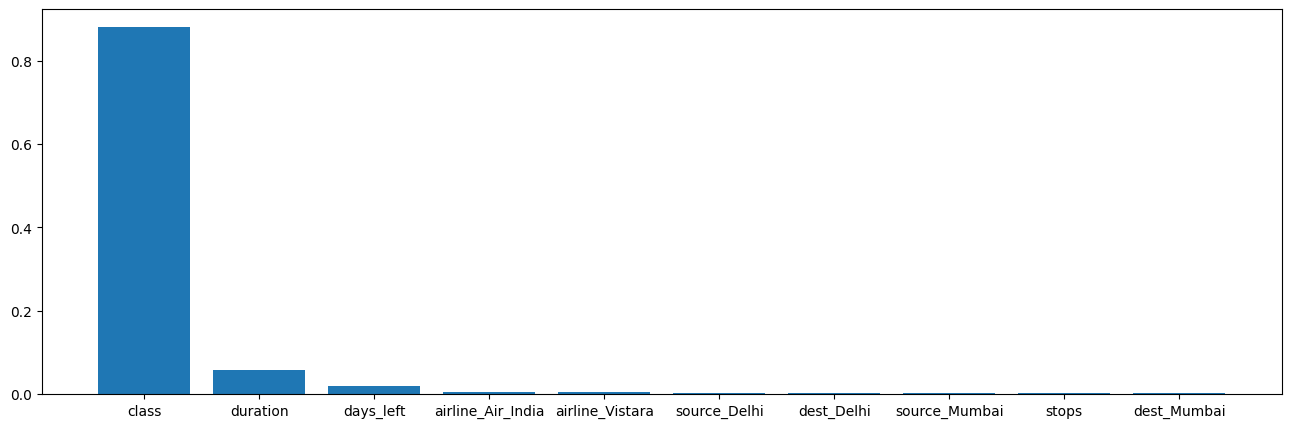

In [35]:
plt.figure(figsize=(16,5))
plt.bar([x[0] for x in sorted_imps[:10]], [x[1] for x in sorted_imps[:10]])
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Training takes time from gridsearchcv but less MSE, MAE and RMSE

param_grid={
    'n_estimators':[100,200,300],
    'ax_depth': [None, 10, 20, 30],
    'in_samples_split': [2, 5, 10],
    'in_samples_leaf': [1, 2, 4],
    'ax_features': ['auto', 'sqrt'],

}
grid_search=GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [48]:
param_dist={
    'n_estimators':randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 5, 10),
    'min_samples_leaf': randint(1, 2, 4),
    'max_features': [1, 'sqrt', 'sqrt'],

}

reg=RandomForestRegressor(n_jobs=1)
random_search=RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', 
                                 verbose=2, random_state=10, n_jobs=1)

random_search.fit(X_train, y_train)
test_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=115; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=115; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=115; total time=   6.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=257; total time=  33.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=257; total time=  33.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=257; total time=  32.7s


In [49]:
test_regressor.score(X_test, y_test)

0.9820579469799066

In [50]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred=test_regressor.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_absolute_error(y_test, y_pred)))

R2:  0.9820579469799066
MAE:  1588.7268463401938
MSE:  9269652.996333871
RMSE:  39.85883649004564


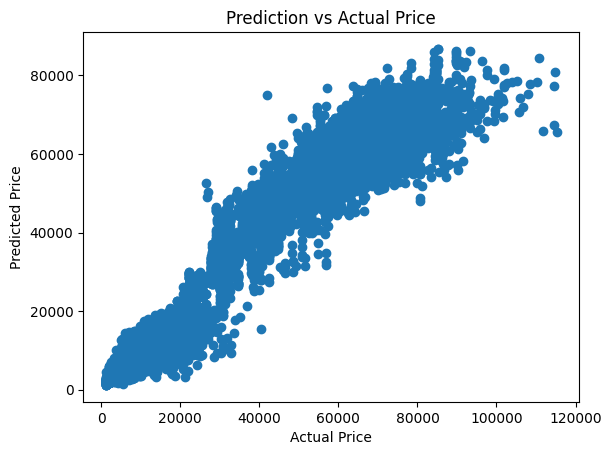

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Actual Price")
plt.show()